In [1]:
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/My Drive/project/"
sys.path.append(path + "URP")
sys.path.append(path + "URP/learning")
sys.path.append(path + "URP/data")
sys.path.append(path + "URP/models")

In [ ]:
%cd /content/drive/My Drive/project/URP/data
!ls

/content/drive/My Drive/project/URP/data
csv_datasets  data.py  data_test.ipynb	data_utils.py  __pycache__


In [6]:
'''Test created models here'''

### for pc
#sys.path.append("..")
#sys.path.append("../data")
#sys.path.append("../models")

from data import get_dataset, dummy_clusters, dummy_half_doughnuts
from models_utils import *
import models
import torch.nn as nn
from learn import *

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 50, "dropout": True, "batch_norm": True}
cnn_model = get_model("cnn", **cnn)
print(cnn_model.__class__.__name__)

CNN


In [ ]:
cifar10_train, cifar10_val, cifar10_test = get_dataset("cifar10", batch_size=32, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Files already downloaded and verified
Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 32


Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.5637495517730713, "error": 0.4375}
[0] test metrics:{"loss": 0.8987796306610107, "error": 0.5}
0.8987796306610107
validation loss  0.8987796306610107
Epoch number: 0 
Epoch Time: 13.27 sec
[1] train metrics:{"loss": 1.1687754392623901, "error": 0.4375}
[1] test metrics:{"loss": 1.5070515871047974, "error": 0.5}
1.5070515871047974
validation loss  1.5070515871047974
Epoch number: 1 
Epoch Time: 13.18 sec
[2] train metrics:{"loss": 1.402037262916565, "error": 0.625}
[2] test metrics:{"loss": 1.3658870458602905, "error": 0.375}
1.3658870458602905
validation loss  1.3658870458602905
Epoch number: 2 
Epoch Time: 13.27 sec
[3] train metrics:{"loss": 1.2812395095825195, "error": 0.375}
[3] test metrics:{"loss": 0.9951825737953186, "error": 0.625}
0.9951825737953186
validation loss  0.9951825737953186
Epoch number: 3 
Epoch Time: 13.28 sec
[4] train metrics:{"loss": 1.5567991733551025, 

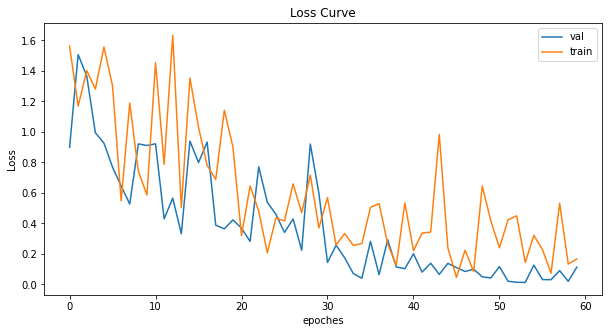

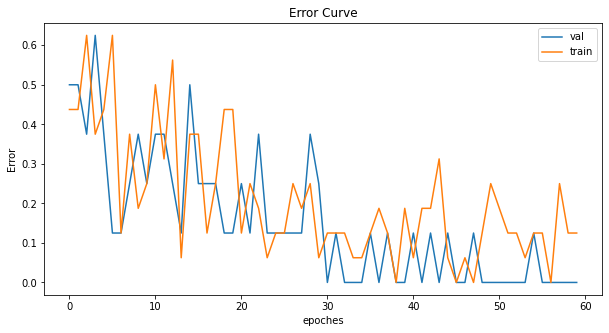

In [ ]:
train(model=cnn_model, loss='ce', optimizer='adam', scheduler=None, epochs=60, device=device, dataset='cifar10', lossfn=None, train_loader=cifar10_train,
      val_loader=cifar10_val, weight_decay=0.0, lr=0.001, momentum=0, patience=10, min_delta=-2)

In [ ]:
test(model=cnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar10', test_loader=cifar10_test, at_epoch=60)

Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
[0] test metrics:{"loss": 0.20632104575634003, "error": 0.09999996423721313}
FINISHED TESTING


In [ ]:
from google.colab import files
files.download('./checkpoints/CNN_60.pth.tar') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dnn = {"input_size": 1024, "hidden_size":32, "num_classes":10,"num_layer": 6, "activation": nn.ReLU()}
model = get_model("mlp", **dnn)
print(model.__class__.__name__)

MLP


In [ ]:
mnist_train, mnist_val, mnist_test = get_dataset("mnist", batch_size=16, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 16


Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 2.155388593673706, "error": 0.8125}
[0] test metrics:{"loss": 2.0400190353393555, "error": 0.75}
Epoch number: 0 
Epoch Time: 5.66 sec
[1] train metrics:{"loss": 1.9363903999328613, "error": 0.8125}
[1] test metrics:{"loss": 1.641015887260437, "error": 0.625}
Epoch number: 1 
Epoch Time: 5.72 sec
[2] train metrics:{"loss": 1.6502424478530884, "error": 0.5625}
[2] test metrics:{"loss": 1.3189431428909302, "error": 0.5}
Epoch number: 2 
Epoch Time: 5.64 sec
[3] train metrics:{"loss": 1.4183483123779297, "error": 0.375}
[3] test metrics:{"loss": 1.1614638566970825, "error": 0.625}
Epoch number: 3 
Epoch Time: 5.59 sec
[4] train metrics:{"loss": 0.9972471594810486, "error": 0.3125}
[4] test metrics:{"loss": 1.1386728286743164, "error": 0.5}
Epoch number: 4 
Epoch Time: 5.74 sec
[5] train metrics:{"loss": 1.4088622331619263, "error": 0.5625}
[5] test metrics:{"loss": 0.9883172512054443,

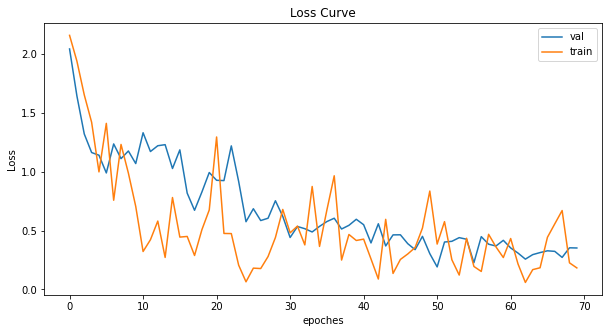

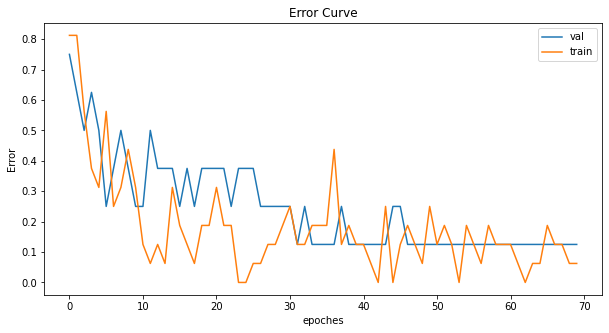

In [ ]:
train(model=model, loss='ce', optimizer='sgd', scheduler=None, epochs=70, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
      val_loader=mnist_val, weight_decay=0, lr=0.001, momentum=0.7, patience=5, min_delta=-0.6)

In [ ]:
test(model=model, loss='ce', optimizer='sgd', device=device, lossfn=None, dataset='mnist', test_loader=mnist_test, at_epoch=70)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
[0] test metrics:{"loss": 0.17309275269508362, "error": 0.0}
FINISHED TESTING


In [ ]:
from google.colab import files
files.download('./checkpoints/MLP_70.pth.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fashion_train, fashion_val, fashion_test =get_dataset("fashion-mnist", batch_size=16, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 16


In [17]:
cifar100_train, cifar100_val, cifar100_test = get_dataset("cifar100", batch_size=32, cuda=0,
                  train_size=20000, val_size=2000, test_size=1000,
                  test_batch_size=10)

Files already downloaded and verified
Dataset sizes: 	 train: 20000 	 val: 2000 	 test: 1000
Batch size: 	 32


In [18]:
resnet18 = {"filters_percentage": 0.4, "n_channels":3,"num_classes": 100, "block": ResBlock, "num_blocks": [2,2,2,2]}
model = get_model("resnet18", **resnet18)
print(model.__class__.__name__)

ResNet18


Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 4.3331451416015625, "error": 1.0}
[0] test metrics:{"loss": 4.1648335456848145, "error": 0.9375}
Epoch number: 0 
Epoch Time: 13.31 sec
[1] train metrics:{"loss": 4.455126762390137, "error": 1.0}
[1] test metrics:{"loss": 3.9248647689819336, "error": 0.875}
Epoch number: 1 
Epoch Time: 13.25 sec
[2] train metrics:{"loss": 4.092843055725098, "error": 0.96875}
[2] test metrics:{"loss": 3.812602996826172, "error": 0.875}
Epoch number: 2 
Epoch Time: 13.33 sec
[3] train metrics:{"loss": 4.0139994621276855, "error": 0.96875}
[3] test metrics:{"loss": 3.803135871887207, "error": 0.875}
Epoch number: 3 
Epoch Time: 13.1 sec
[4] train metrics:{"loss": 3.906055450439453, "error": 0.9375}
[4] test metrics:{"loss": 3.612525224685669, "error": 0.8125}
Epoch number: 4 
Epoch Time: 13.2 sec
[5] train metrics:{"loss": 3.4563231468200684, "error": 0.75}
[5] test metrics:{"loss": 3.41201901435

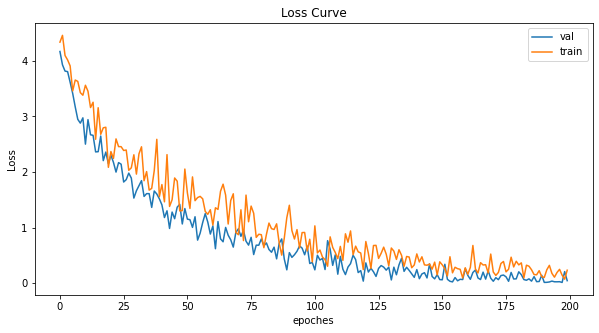

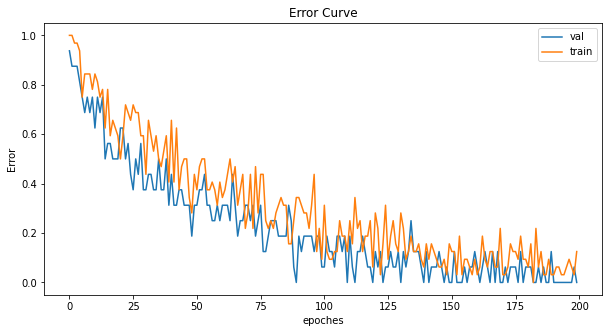

In [19]:
train(model=model, loss='ce', optimizer='sgd', scheduler=None, epochs=200, device=device, dataset='cifar100', lossfn=None, train_loader=cifar100_train,
      val_loader=cifar100_val, weight_decay=0, lr=0.001, momentum=0.7, patience=5, min_delta=-0.6)

In [22]:
test(model=model, loss='ce', optimizer='sgd', device=device, lossfn=None, dataset='cifar100', test_loader=cifar100_test, at_epoch=200)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
[0] test metrics:{"loss": 2.2989907264709473, "error": 0.3999999761581421}
FINISHED TESTING


In [24]:
! ls ./checkpoints/
from google.colab import files
files.download('./checkpoints/ResNet18_200.pth.tar')

ResNet18_200.pth.tar  ResNet18_70.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train, val, test = get_dataset("csv", path='../data/csv_datasets/winequality-red.csv')
train(model=model, loss='ce', optimizer='sgd', scheduler=None, epochs=30, device=device, dataset='non', lossfn=None, train_loader=train, val_loader=test, weight_decay=0.0, lr=0.001, momentum=0.9)